In [2]:
!pip install gensim

     |████████████████████████████████| 24.2 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 119 kB 5.5 MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-4.2.0-py3-none-any.whl size=109632 sha256=b080ce5f37330efee6b80313d5c019657dbef13dfd211f2e0a40aa8e2dc5a849
  Stored in directory: /Users/apple/Library/Caches/pip/wheels/24/f6/ea/70a0761bdfaeacff66662751fe71920e25c4c43d97098a3886
Successfully built smart-open


In [7]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [4]:

# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])


['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[-2.8681026e-03 -3.9954409e-03 -2.3939812e-03  2.4108493e-03
 -4.7150603e-03 -1.2840306e-03 -2.5836318e-03 -2.3448442e-03
  7.4851437e-04  9.6512935e-04 -4.8654974e-03  3.5732915e-03
  2.3372632e-03  4.1356040e-03  4.3970463e-03 -1.0364990e-03
  2.3847923e-03 -3.1707980e-04 -2.7086306e-03 -4.6727634e-03
 -2.0878604e-03 -1.5039926e-03  5.5917155e-04 -1.8237426e-04
  4.3302123e-03 -2.0551081e-03  4.3517253e-03  4.4628170e-05
  3.3698715e-03  3.8510857e-03  1.5824255e-04  1.6094091e-04
  1.7628671e-03  2.0312695e-03  4.6572648e-03  3.5557960e-04
 -1.0538755e-03  3.3887743e-03 -4.9637221e-03  4.0550094e-05
 -3.2095411e-03 -1.2259738e-03  9.9550525e-04  7.1371673e-04
 -4.2542596e-03  2.3582636e-03  2.5595101e-03  3.8454232e-03
 -1.7440985e-03  3.4242929e-03  2.5632509e-03  6.0863036e-04
 -3.9989213e-03 -2.4504347e-03 -3.2278250e-03 -4.8669991e-03
 -2.4100966e-03  4.011178

<ipython-input-4-7b7d8b9a63e6>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model['sentence'])


In [5]:
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)



Word2Vec(vocab=14, size=100, alpha=0.025)


<ipython-input-6-677c984a1ad5>:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


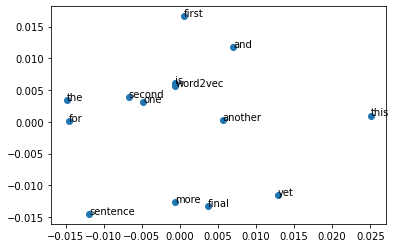

In [6]:

from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()